<a href="https://colab.research.google.com/github/KrRA1122/Deep-learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Target feature here is PE (Power Plant Energy output)

step: Basic QA checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
df.duplicated().sum()

41

In [5]:
df.duplicated().sum()/len(df)

0.004285117056856187

Step 3: Seperate X and Y(PE)

In [6]:
X = df.drop(columns=['PE'])
Y = df[['PE']]


In [7]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [8]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Create a Preprocessing Pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


Step 5: Apply train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [13]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [14]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [15]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [16]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


Step 5: Build the Keras neural network

In [18]:
xtrain.shape[1]


4

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [20]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [23]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)


Epoch 1/100
192/192 [==============================] - 4s 5ms/step - loss: 205576.5312 - mae: 453.0602 - val_loss: 202943.6875 - val_mae: 450.1234
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 199045.8594 - mae: 445.6837 - val_loss: 190992.7031 - val_mae: 436.4451
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 177857.6406 - mae: 420.6132 - val_loss: 159106.8906 - val_mae: 397.2338
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 136930.0000 - mae: 366.0896 - val_loss: 110941.2812 - val_mae: 326.6623
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 88600.4062 - mae: 285.0231 - val_loss: 66084.9531 - val_mae: 238.8350
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 52123.9492 - mae: 206.6912 - val_loss: 39375.9180 - val_mae: 175.9274
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 33133.5156 - mae: 158.8938 - val_loss: 27312.90

Evaluate the model in train and test

In [24]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 5ms/step - loss: 20.4553 - mae: 3.5261


[20.455293655395508, 3.526078939437866]

In [25]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 5ms/step - loss: 19.5572 - mae: 3.4939


[19.55722427368164, 3.493919610977173]

Plot the learning curve|

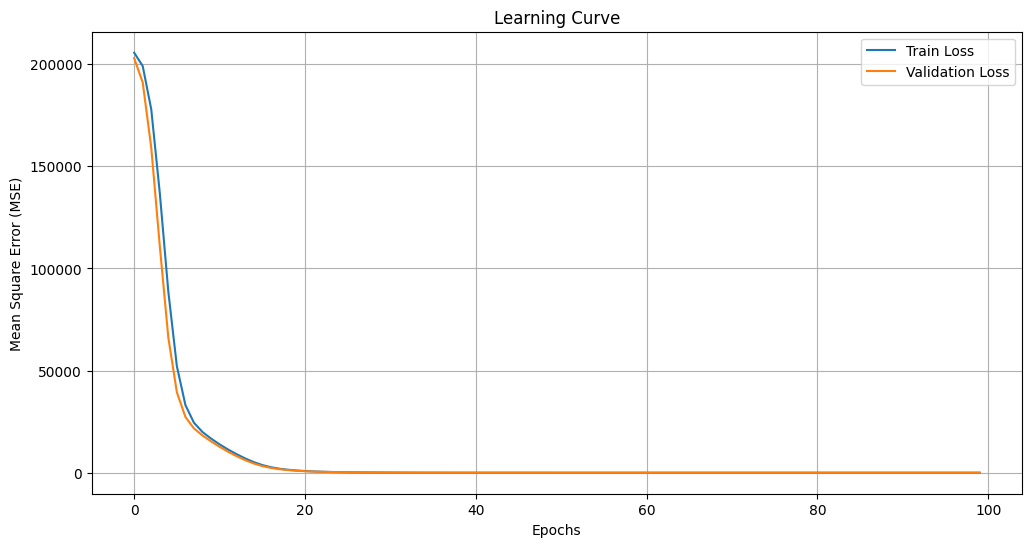

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

Predict the results for train and test

In [27]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [28]:
ypred_train[0:5]

array([[441.72318],
       [434.87598],
       [433.4172 ],
       [432.80484],
       [432.88492]], dtype=float32)

In [29]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [30]:
ypred_test[0:5]

array([[435.27756],
       [436.6015 ],
       [462.48267],
       [478.18173],
       [434.89664]], dtype=float32)

In [31]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


Perform detailed evaluation

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [33]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [34]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 2ms/step
Mean Squared Error : 20.46
Root Mean Squared Error : 4.52
Mean Absolute Error : 3.53
R2 Score : 0.9301


In [35]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 2ms/step
Mean Squared Error : 19.56
Root Mean Squared Error : 4.42
Mean Absolute Error : 3.49
R2 Score : 0.9317


R2 score in test is 0.9336 > 0.8 hence above model is very good

Saving above model (.keras)

In [36]:
model.save('PowerOutput.keras')

In [37]:
#Load the above model(TT)
from keras.models import load_model
m = load_model('/content/PowerOutput.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.2570881 , -0.05762989,  0.02367143, -1.341676  ,  0.23478457,
          0.39861295,  0.16097833, -0.797232  ],
        [ 0.35664174, -1.0222378 ,  0.6025327 , -1.4696786 ,  0.9728003 ,
          0.8480034 ,  0.67306167, -1.2319041 ],
        [ 0.02402116,  0.23536922, -0.47684407,  0.12087531,  0.2795696 ,
          0.0592567 , -0.46525273,  0.09386159],
        [-0.777589  ,  0.54232633, -0.2365938 ,  0.15290079,  0.6683538 ,
          0.16284175, -0.25543752, -0.5781164 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([3.3543248, 3.4166138, 3.2569017, 3.589978 , 2.898941 , 3.2015212,
        3.3714979, 3.7701735], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 1.7094885 ,  1.8100955 ,  2.1845224 ,  1.1341795 ],
        [ 1.6230054 ,  2.792949  ,  2.8127494 , -2.6698015 ],
        [ 2.0025613 ,  2.2436695 ,  2.3550005 , 